In [3]:
# import required libraries
# pandas:Data framework library for Python
# sklearn: Library to perform machine learning tasks
import pandas as pd
import numpy as np
import scipy
import scipy.stats as st
import sklearn 
import sklearn.datasets
import sklearn.metrics as metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.feature_selection import mutual_info_classif
from scipy import stats

In [133]:
from datetime import datetime

In [783]:
Data_2017 = pd.read_excel("PERM_Disclosure_Data_FY17.xlsx")

In [784]:
Data_2015 = pd.read_excel("PERM_Disclosure_Data_FY15_Q4.xlsx")

In [785]:
Data_2016 = pd.read_excel("PERM_Data_FY16.xlsx")

In [349]:
#pd.to_datetime(Data_2015['RI_LOCAL_ETHNIC_PAPER_FROM'].iloc[2][:10], format='%Y-%m-%d')
#datetime.strptime(Data_2015['RI_LOCAL_ETHNIC_PAPER_FROM'].iloc[2][:10], '%m%Y')

Data_2015['RI_LOCAL_ETHNIC_PAPER_FROM'] = np.where(Data_2015['RI_LOCAL_ETHNIC_PAPER_FROM'].isnull(), pd.NaT, Data_2015['RI_LOCAL_ETHNIC_PAPER_FROM'])

RI_EMPLOYEE_REFERRAL_PROG_FROM            object
RI_CAMPUS_PLACEMENT_FROM                  object

In [793]:
Data_2015.at[8809, 'RI_LOCAL_ETHNIC_PAPER_FROM'] = datetime.strptime('10/22/2014', '%m/%d/%Y')
Data_2015.at[29257, 'RI_LOCAL_ETHNIC_PAPER_FROM'] = datetime.strptime('10/06/2014', '%m/%d/%Y')
Data_2015.at[86322, 'RI_LOCAL_ETHNIC_PAPER_FROM'] = datetime.strptime('03/09/2015', '%m/%d/%Y')
Data_2015['RI_LOCAL_ETHNIC_PAPER_FROM'] = pandas.to_datetime(Data_2015['RI_LOCAL_ETHNIC_PAPER_FROM'])
Data_2015['RECR_INFO_SWA_JOB_ORDER_START'] = pandas.to_datetime(Data_2015['RECR_INFO_SWA_JOB_ORDER_START'])
Data_2015.at[6306, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('05/26/2014', '%m/%d/%Y')
Data_2015.at[8602, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('11/08/2014', '%m/%d/%Y')
Data_2015.at[12210, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('05/25/2014', '%m/%d/%Y')
Data_2015.at[35208, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('08/30/2013', '%m/%d/%Y')
Data_2015.at[41211, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/25/2014', '%m/%d/%Y')
Data_2015.at[79773, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('05/19/2014', '%m/%d/%Y')
Data_2015.at[80176, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('06/14/2015', '%m/%d/%Y')
Data_2015.at[80177, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('06/14/2015', '%m/%d/%Y')
Data_2015.at[83651, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('05/26/2013', '%m/%d/%Y')
Data_2015['RECR_INFO_SWA_JOB_ORDER_END'] = pandas.to_datetime(Data_2015['RECR_INFO_SWA_JOB_ORDER_END'])
Data_2015.at[76114, 'RI_EMPLOYER_WEB_POST_FROM'] = datetime.strptime('04/22/2014', '%m/%d/%Y')
Data_2015.at[89154, 'RI_EMPLOYER_WEB_POST_FROM'] = datetime.strptime('05/01/2015', '%m/%d/%Y')
Data_2015['RI_EMPLOYER_WEB_POST_FROM'] = pandas.to_datetime(Data_2015['RI_EMPLOYER_WEB_POST_FROM'])
Data_2015.at[29489, 'RECR_INFO_PRO_ORG_ADVERT_FROM'] = datetime.strptime('01/01/2013', '%m/%d/%Y')
Data_2015['RECR_INFO_PRO_ORG_ADVERT_FROM'] = pandas.to_datetime(Data_2015['RECR_INFO_PRO_ORG_ADVERT_FROM'])
Data_2015.at[26192, 'RI_JOB_SEARCH_WEBSITE_FROM'] = datetime.strptime('01/13/2014', '%m/%d/%Y')
Data_2015.at[70342, 'RI_JOB_SEARCH_WEBSITE_FROM'] = datetime.strptime('05/02/2014', '%m/%d/%Y')
Data_2015.at[83733, 'RI_JOB_SEARCH_WEBSITE_FROM'] = datetime.strptime('11/15/2011', '%m/%d/%Y')
Data_2015['RI_JOB_SEARCH_WEBSITE_FROM'] = pandas.to_datetime(Data_2015['RI_JOB_SEARCH_WEBSITE_FROM'])
Data_2015.at[24138, 'RI_EMPLOYEE_REFERRAL_PROG_FROM'] = datetime.strptime('12/23/2014', '%m/%d/%Y')
Data_2015.at[38262, 'RI_EMPLOYEE_REFERRAL_PROG_FROM'] = datetime.strptime('06/04/2014', '%m/%d/%Y')
Data_2015.at[47808, 'RI_EMPLOYEE_REFERRAL_PROG_FROM'] = datetime.strptime('06/25/2014', '%m/%d/%Y')
Data_2015['RI_EMPLOYEE_REFERRAL_PROG_FROM'] = pandas.to_datetime(Data_2015['RI_EMPLOYEE_REFERRAL_PROG_FROM'])
Data_2015.at[14771, 'RI_CAMPUS_PLACEMENT_FROM'] = datetime.strptime('04/01/2013', '%m/%d/%Y')
Data_2015.at[49525, 'RI_CAMPUS_PLACEMENT_FROM'] = datetime.strptime('05/02/2013', '%m/%d/%Y')
Data_2015.at[73061, 'RI_CAMPUS_PLACEMENT_FROM'] = datetime.strptime('09/23/2014', '%m/%d/%Y')
Data_2015['RI_CAMPUS_PLACEMENT_FROM'] = pandas.to_datetime(Data_2015['RI_CAMPUS_PLACEMENT_FROM'])

#used to check for messed up dates
for i, row in Data_2015.iterrows():
    #if i > 29489:
    print(i)
    print(row['RI_CAMPUS_PLACEMENT_FROM'])
    ifor_val = pd.to_datetime(row['RI_CAMPUS_PLACEMENT_FROM'])
    Data_2015.set_value(i,'RI_CAMPUS_PLACEMENT_FROM',ifor_val)

In [749]:
nm15 = list(Data_2015.columns.values)
nm16 = list(Data_2016.columns.values)
nm17 = list(Data_2017.columns.values)

In [786]:
#Change the column names so they match between years
Data_2016=Data_2016.rename(columns = {'FW_INFO_REL_OCCUP_EXPERIENCE':'FW_INFO_REL_OCCUP_EXP'})
Data_2015=Data_2015.rename(columns = {'JI_FOREIGN_WORKER_LIVE_ON_PREMISES':'JI_FW_LIVE_ON_PREMISES'})
Data_2015=Data_2015.rename(columns = {'REC_INFO_BARG_REP_NOTIFIED':'RECR_INFO_BARG_REP_NOTIFIED'})
Data_2015=Data_2015.rename(columns = {'JI_OFFERED_TO_SEC_J_FOREIGN_WORKER':'JI_OFFERED_TO_SEC_J_FW'})
Data_2017=Data_2017.rename(columns = {'PW_JOB_TITLE_9089':'PW_Job_Title_9089'})

In [799]:
frames = [Data_2015, Data_2016, Data_2017]

data = pd.concat(frames)

In [800]:
data = data.drop_duplicates()

In [855]:
data.dtypes

CASE_NUMBER                               object
DECISION_DATE                     datetime64[ns]
CASE_STATUS                               object
CASE_RECEIVED_DATE                datetime64[ns]
REFILE                                    object
ORIG_FILE_DATE                    datetime64[ns]
ORIG_CASE_NO                              object
SCHD_A_SHEEPHERDER                        object
EMPLOYER_NAME                             object
EMPLOYER_ADDRESS_1                        object
EMPLOYER_ADDRESS_2                        object
EMPLOYER_CITY                             object
EMPLOYER_STATE                            object
EMPLOYER_COUNTRY                          object
EMPLOYER_POSTAL_CODE                      object
EMPLOYER_PHONE                            object
EMPLOYER_PHONE_EXT                        object
EMPLOYER_NUM_EMPLOYEES                   float64
EMPLOYER_YR_ESTAB                        float64
FW_OWNERSHIP_INTEREST                     object
AGENT_FIRM_NAME     

## General EDA

In [778]:
data.CASE_NUMBER.unique().size

214756

In [71]:
data.CASE_STATUS.unique()

array(['Certified-Expired', 'Certified', 'Denied', 'Withdrawn'], dtype=object)

In [802]:
(data['CASE_STATUS'].value_counts(dropna=False) / data['CASE_STATUS'].value_counts(dropna=False).sum()) * 100

Certified            45.399285
Certified-Expired    44.879625
Denied                5.696443
Withdrawn             4.024647
Name: CASE_STATUS, dtype: float64

In [803]:
(data['REFILE'].value_counts(dropna=False) / data['REFILE'].value_counts(dropna=False).sum()) * 100
#small percentage of refile, no need

N      61.091669
NaN    38.830670
Y       0.077661
Name: REFILE, dtype: float64

In [804]:
(data['SCHD_A_SHEEPHERDER'].value_counts(dropna=False) / data['SCHD_A_SHEEPHERDER'].value_counts(dropna=False).sum()) * 100

N      99.991691
NaN     0.008309
Name: SCHD_A_SHEEPHERDER, dtype: float64

In [805]:
data['EMPLOYER_NUM_EMPLOYEES'].count()

312791

In [806]:
(data['FW_OWNERSHIP_INTEREST'].value_counts(dropna=False) / data['FW_OWNERSHIP_INTEREST'].value_counts(dropna=False).sum()) * 100

N      99.457649
Y       0.486422
NaN     0.055929
Name: FW_OWNERSHIP_INTEREST, dtype: float64

In [807]:
data['AGENT_FIRM_NAME'].isnull().sum() / 341585 * 100

12.370566623241652

In [808]:
(data['JI_OFFERED_TO_SEC_J_FW'].value_counts(dropna=False) / data['JI_OFFERED_TO_SEC_J_FW'].value_counts(dropna=False).sum()) * 100

Y      99.980185
N       0.015660
NaN     0.004155
Name: JI_OFFERED_TO_SEC_J_FW, dtype: float64

In [809]:
(data['JI_FW_LIVE_ON_PREMISES'].value_counts(dropna=False) / data['JI_FW_LIVE_ON_PREMISES'].value_counts(dropna=False).sum()) * 100

N      99.803130
Y       0.137425
NaN     0.059444
Name: JI_FW_LIVE_ON_PREMISES, dtype: float64

In [810]:
(data['JI_LIVE_IN_DOMESTIC_SERVICE'].value_counts(dropna=False) / data['JI_LIVE_IN_DOMESTIC_SERVICE'].value_counts(dropna=False).sum()) * 100

N      99.86641
Y       0.07862
NaN     0.05497
Name: JI_LIVE_IN_DOMESTIC_SERVICE, dtype: float64

In [811]:
(data['JI_LIVE_IN_DOM_SVC_CONTRACT'].value_counts(dropna=False) / data['JI_LIVE_IN_DOM_SVC_CONTRACT'].value_counts(dropna=False).sum()) * 100

NaN    98.966433
A       0.909245
Y       0.078301
N       0.046022
Name: JI_LIVE_IN_DOM_SVC_CONTRACT, dtype: float64

In [813]:
(data['RECR_INFO_EMPLOYER_REC_PAYMENT'].value_counts(dropna=False) / data['RECR_INFO_EMPLOYER_REC_PAYMENT'].value_counts(dropna=False).sum()) * 100

N      99.985938
NaN     0.009907
Y       0.004155
Name: RECR_INFO_EMPLOYER_REC_PAYMENT, dtype: float64

In [814]:
(data['RI_LAYOFF_IN_PAST_SIX_MONTHS'].value_counts(dropna=False) / data['RI_LAYOFF_IN_PAST_SIX_MONTHS'].value_counts(dropna=False).sum()) * 100

N      96.258194
Y       3.727105
NaN     0.014701
Name: RI_LAYOFF_IN_PAST_SIX_MONTHS, dtype: float64

In [815]:
(data['RI_US_WORKERS_CONSIDERED'].value_counts(dropna=False) / data['RI_US_WORKERS_CONSIDERED'].value_counts(dropna=False).sum()) * 100

NaN    93.128090
Y       3.447780
A       3.367881
N       0.056249
Name: RI_US_WORKERS_CONSIDERED, dtype: float64

In [816]:
(data['RI_COLL_TCH_BASIC_PROCESS'].value_counts(dropna=False) / data['RI_COLL_TCH_BASIC_PROCESS'].value_counts(dropna=False).sum()) * 100

NaN    97.007002
N       2.667971
Y       0.325027
Name: RI_COLL_TCH_BASIC_PROCESS, dtype: float64

## Education: required and of FW

In [817]:
job_info = (data['JOB_INFO_EDUCATION'].value_counts(dropna=False) / data['JOB_INFO_EDUCATION'].value_counts(dropna=False).sum()) * 100

In [818]:
tmp_pivot = pd.pivot_table(pd.DataFrame(job_info).reset_index(), columns = ['index'])

In [819]:
tmp_pivot = tmp_pivot.reset_index()
del tmp_pivot['index']

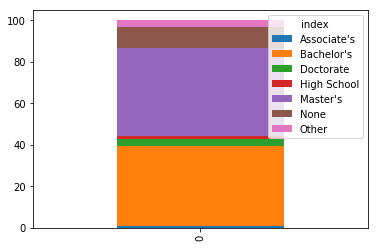

In [820]:
%matplotlib inline
import matplotlib.pyplot as plt
#ind_code_det = ind_code_det.set_index('Name')
tmp_pivot.plot.bar(stacked=True)
plt.xlabel("")
plt.savefig('Education degree mins.png')

In [821]:
fw_info = (data['FOREIGN_WORKER_INFO_EDUCATION'].value_counts(dropna=False) / data['FOREIGN_WORKER_INFO_EDUCATION'].value_counts(dropna=False).sum()) * 100

In [822]:
fw_info

Master's       42.759119
Bachelor's     36.784309
None            8.170420
Doctorate       4.965532
Other           4.241012
High School     2.057226
Associate's     0.957823
NaN             0.064558
Name: FOREIGN_WORKER_INFO_EDUCATION, dtype: float64

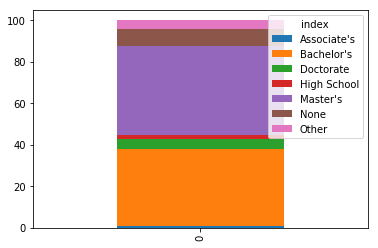

In [823]:
tmp_pivot2 = pd.pivot_table(pd.DataFrame(fw_info).reset_index(), columns = ['index'])
tmp_pivot2 = tmp_pivot2.reset_index()
del tmp_pivot2['index']
%matplotlib inline
import matplotlib.pyplot as plt
#ind_code_det = ind_code_det.set_index('Name')
tmp_pivot2.plot.bar(stacked=True)
plt.xlabel("")
plt.savefig('Education degree of FW.png')

## Prevailing wage and pay

In [824]:
tmp_wage = (data['PW_LEVEL_9089'].value_counts(dropna=False) / data['PW_LEVEL_9089'].value_counts(dropna=False).sum()) * 100
#Level I entry
#LEvel II qualified
#Level III experienced
#LEvel IV fully qualified

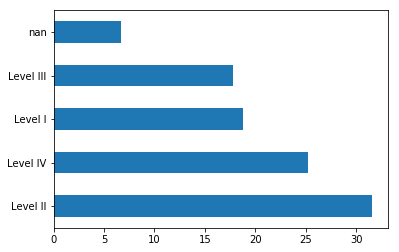

In [825]:
%matplotlib inline
import matplotlib.pyplot as plt
#ind_code_det = ind_code_det.set_index('Name')
tmp_wage.plot.barh()
#plt.savefig('Industries.png')

In [826]:
(data['WAGE_OFFER_UNIT_OF_PAY_9089'].value_counts(dropna=False) / data['WAGE_OFFER_UNIT_OF_PAY_9089'].value_counts(dropna=False).sum()) * 100

Year         96.412877
Hour          3.085360
NaN           0.401090
Week          0.057847
Month         0.034197
Bi-Weekly     0.008629
Name: WAGE_OFFER_UNIT_OF_PAY_9089, dtype: float64

In [856]:
#For wages that have a to and from, Im just gonna take the average
data_wage = data[['WAGE_OFFER_UNIT_OF_PAY_9089','WAGE_OFFER_FROM_9089','WAGE_OFFER_TO_9089','CASE_STATUS']]
#cleaning up the wages
#pd.to_numeric(data_wage['WAGE_OFFER_FROM_9089'])
data_wage['WAGE_OFFER_FROM_9089'] = data_wage['WAGE_OFFER_FROM_9089'].apply(lambda word: str(word).replace("#", ""))
data_wage['WAGE_OFFER_FROM_9089'] = data_wage['WAGE_OFFER_FROM_9089'].apply(lambda word: str(word).replace(",", ""))
data_wage['WAGE_OFFER_FROM_9089'] = data_wage['WAGE_OFFER_FROM_9089'].replace({"nan": np.NaN})
data_wage['WAGE_OFFER_FROM_9089'] = pd.to_numeric(data_wage['WAGE_OFFER_FROM_9089'])
data_wage['WAGE_OFFER_TO_9089'] = data_wage['WAGE_OFFER_TO_9089'].apply(lambda word: str(word).replace("#", ""))
data_wage['WAGE_OFFER_TO_9089'] = data_wage['WAGE_OFFER_TO_9089'].apply(lambda word: str(word).replace(",", ""))
data_wage['WAGE_OFFER_TO_9089'] = data_wage['WAGE_OFFER_TO_9089'].replace({"nan": np.NaN})
data_wage['WAGE_OFFER_TO_9089'] = pd.to_numeric(data_wage['WAGE_OFFER_TO_9089'])

In [857]:
#Getting average wage for to - from
data_wage['Avg_Wage'] = np.where(pd.isnull(data_wage['WAGE_OFFER_TO_9089']) == True,data_wage['WAGE_OFFER_FROM_9089'], ((data_wage['WAGE_OFFER_TO_9089']+ data_wage['WAGE_OFFER_FROM_9089']) / 2)) 

In [858]:
data_wage.WAGE_OFFER_UNIT_OF_PAY_9089.fillna('None', inplace=True)

In [859]:
data_wage['WAGE_OFFER_UNIT_OF_PAY_9089'] = data_wage['WAGE_OFFER_UNIT_OF_PAY_9089'].astype('str') 

In [860]:
data_wage['unit'] = data_wage['WAGE_OFFER_UNIT_OF_PAY_9089']
data_wage['unit'] = data_wage['unit'].replace({"Hour": 2080, "Week":52,"Month":12,"Bi-Weekly":26,"Year":1,"None":np.NaN})
data_wage['unit'] = pd.to_numeric(data_wage['unit'])

In [861]:
data_wage['Year_wage'] = data_wage['Avg_Wage'] * data_wage['unit']

In [867]:
prev_wage = data[['CASE_NUMBER','PW_AMOUNT_9089','PW_UNIT_OF_PAY_9089']]

In [869]:
prev_wage['PW_AMOUNT_9089'] = prev_wage['PW_AMOUNT_9089'].apply(lambda word: str(word).replace("#", ""))
prev_wage['PW_AMOUNT_9089'] = prev_wage['PW_AMOUNT_9089'].apply(lambda word: str(word).replace(",", ""))
prev_wage['PW_AMOUNT_9089'] = prev_wage['PW_AMOUNT_9089'].replace({"nan": np.NaN})
prev_wage['PW_AMOUNT_9089'] = pd.to_numeric(prev_wage['PW_AMOUNT_9089'])

In [870]:
prev_wage['unit'] = prev_wage['PW_UNIT_OF_PAY_9089']
prev_wage['unit'] = prev_wage['unit'].replace({"Hour": 2080, "Week":52,"Month":12,"Bi-Weekly":26,"Year":1,"None":np.NaN})
prev_wage['unit'] = pd.to_numeric(data_wage['unit'])

In [871]:
prev_wage['Year_wage'] = prev_wage['PW_AMOUNT_9089'] * prev_wage['unit']

In [862]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [863]:
dolas = np.asarray(list(data_wage['Year_wage'].dropna()))
filtered = dolas[~is_outlier(dolas)]

In [626]:
dolas.shape

(340280,)

In [625]:
filtered.shape

(335941,)

In [864]:

def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(np.round(( y / 335941) * 100))

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

# Create the formatter using the function to_percent. This multiplies all the
# default labels by 100, making them all percentages


# Set the formatter


In [865]:
import matplotlib
from numpy.random import randn
import matplotlib.pyplot as plt
def getHistogram(title):
    plt.hist(filtered)
    plt.title(title)
    plt.xlabel("Yearly wage")
    plt.ylabel("Frequency")
    formatter = FuncFormatter(to_percent)
    plt.gca().yaxis.set_major_formatter(formatter)
    fig = plt.gcf()

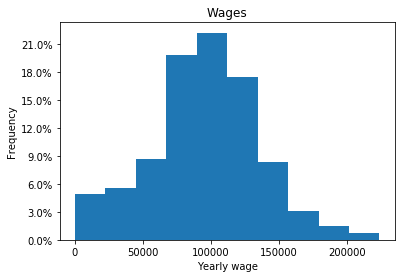

In [866]:
getHistogram("Wages")

## Country of Applicant

In [829]:
tmp_ctry = (data['COUNTRY_OF_CITIZENSHIP'].value_counts(dropna=False) / data['COUNTRY_OF_CITIZENSHIP'].value_counts(dropna=False).sum()) * 100

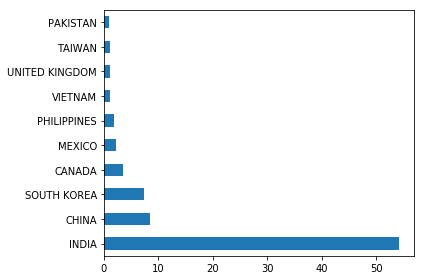

In [830]:
%matplotlib inline
import matplotlib.pyplot as plt
#ind_code_det = ind_code_det.set_index('Name')
tmp_ctry.head(n=10).plot.barh()
plt.tight_layout()
plt.savefig("Country.png")

In [164]:
(data['JOB_INFO_EDUCATION_OTHER'].value_counts(dropna=False) / data['JOB_INFO_EDUCATION_OTHER'].value_counts(dropna=False).sum()) * 100

NaN                                                                                                     96.784988
MD                                                                                                       0.318515
Medical Degree                                                                                           0.316759
M.D.                                                                                                     0.241521
Medical Degree or foreign equivalent                                                                     0.091924
Medical degree                                                                                           0.091632
Doctor of Medicine                                                                                       0.055330
Juris Doctor                                                                                             0.052403
Medical Degree (MD)                                                                     

In [831]:
(data['JOB_INFO_EXPERIENCE'].value_counts(dropna=False) / data['JOB_INFO_EXPERIENCE'].value_counts(dropna=False).sum()) * 100

Y      56.041445
N      43.952802
NaN     0.005753
Name: JOB_INFO_EXPERIENCE, dtype: float64

In [832]:
(data['JOB_INFO_EXPERIENCE_NUM_MONTHS'].value_counts(dropna=False) / data['JOB_INFO_EXPERIENCE_NUM_MONTHS'].value_counts(dropna=False).sum()) * 100

NaN       43.916688
 24.0     15.418812
 12.0     13.641550
 60.0     13.411762
 36.0      6.133009
 6.0       3.059793
 48.0      1.175147
 72.0      0.757757
 84.0      0.546506
 96.0      0.503041
 3.0       0.384472
 120.0     0.324388
 18.0      0.156921
 0.0       0.086930
 1.0       0.086610
 2.0       0.072548
 9.0       0.050496
 108.0     0.042506
 4.0       0.042506
 5.0       0.032599
 144.0     0.030681
 10.0      0.025568
 180.0     0.017258
 30.0      0.016938
 8.0       0.009268
 20.0      0.007351
 156.0     0.004794
 15.0      0.004474
 42.0      0.004155
 240.0     0.003835
 27.0      0.003835
 132.0     0.003516
 168.0     0.003196
 23.0      0.002876
 22.0      0.002237
 13.0      0.002237
 25.0      0.001918
 16.0      0.001918
 21.0      0.000959
 33.0      0.000959
 11.0      0.000959
 26.0      0.000639
 14.0      0.000639
 45.0      0.000639
 85.0      0.000639
 50.0      0.000639
 39.0      0.000320
 47.0      0.000320
 19.0      0.000320
 40.0      0.000320


In [252]:
(data['NAICS_US_TITLE'].value_counts(dropna=False) / data['NAICS_US_TITLE'].value_counts(dropna=False).sum()) * 100

Custom Computer Programming Services                                                     20.334324
Computer Systems Design Services                                                          9.592342
Software Publishers                                                                       4.203639
Colleges, Universities, and Professional Schools                                          3.133042
Poultry Processing                                                                        2.806915
Other Computer Related Services                                                           2.614283
Semiconductor and Other Electronic Component Manufacturing                                2.532313
Computer Systems Design and Related Services                                              2.500695
Engineering Services                                                                      2.097575
Electronic Computer Manufacturing                                                         2.029363
Electronic

In [833]:
(data['NAICS_US_CODE'].value_counts(dropna=False) / data['NAICS_US_CODE'].value_counts(dropna=False).sum()) * 100

#the first 2 numbers are the industry (there are 92), so gonna truncate it
ind_code = data['NAICS_US_CODE'].apply(lambda word: str(word).replace("-", ""))
    

ind_code = ind_code.apply(lambda num: num[:2])
ind_code.value_counts()
#counts for each industry
ind_code = pd.DataFrame(ind_code.value_counts())
ind_code = ind_code.reset_index()
ind_code.columns = ['sector code','count']

In [834]:
ind_code.at[22,'sector code'] = -99
#df.at['C', 'x'] = 10

In [835]:
naics_codes = pd.read_excel("NAICS sector codes.xlsx")

In [836]:
ind_code['sector code'] = pandas.to_numeric(ind_code['sector code'])
naics_codes['Sector'] = pandas.to_numeric(naics_codes['Sector'])

In [837]:
ind_code_det = ind_code.merge(naics_codes, how ="left", left_on = "sector code", right_on = "Sector")
ind_code_det = ind_code_det[['Name','count']]

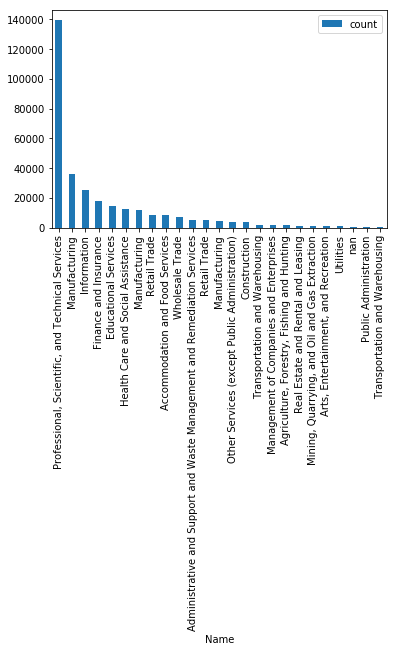

In [839]:
%matplotlib inline
import matplotlib.pyplot as plt
ind_code_det = ind_code_det.set_index('Name')
ind_code_det.plot.bar()
#plt.tight_layout()
plt.savefig('Industries.png')

In [840]:
#Is this for profession, not college / uni professor
(data['RECR_INFO_PROFESSIONAL_OCC'].value_counts(dropna=False) / data['RECR_INFO_PROFESSIONAL_OCC'].value_counts(dropna=False).sum()) * 100

Y      86.376028
N      13.616621
NaN     0.007351
Name: RECR_INFO_PROFESSIONAL_OCC, dtype: float64

In [841]:
#Is this for college / uni professor
(data['RECR_INFO_COLL_UNIV_TEACHER'].value_counts(dropna=False) / data['RECR_INFO_COLL_UNIV_TEACHER'].value_counts(dropna=False).sum()) * 100

N      97.379649
Y       2.607248
NaN     0.013103
Name: RECR_INFO_COLL_UNIV_TEACHER, dtype: float64

In [842]:
(data['RECR_INFO_COLL_TEACH_COMP_PROC'].value_counts(dropna=False) / data['RECR_INFO_COLL_TEACH_COMP_PROC'].value_counts(dropna=False).sum()) * 100

NaN    97.003806
Y       2.457039
N       0.539155
Name: RECR_INFO_COLL_TEACH_COMP_PROC, dtype: float64

In [843]:
(data['JOB_INFO_FOREIGN_ED'].value_counts(dropna=False) / data['JOB_INFO_FOREIGN_ED'].value_counts(dropna=False).sum()) * 100
#since there are 10% no, would be interesting to see if the nos experiences for the other people would still be accepted

Y      89.380531
N      10.539251
NaN     0.080218
Name: JOB_INFO_FOREIGN_ED, dtype: float64

## VISA informaiton

In [844]:
#what was their previous class of admission
(data['CLASS_OF_ADMISSION'].value_counts(dropna=False) / data['CLASS_OF_ADMISSION'].value_counts(dropna=False).sum()) * 100

H-1B          71.812449
NaN            6.901313
L-1            6.109998
F-1            5.055977
Not in USA     3.282550
TN             1.368501
E-2            1.244819
B-2            0.940885
EWI            0.392142
Parolee        0.324707
J-1            0.315439
F-2            0.308408
E-3            0.278686
O-1            0.239376
H-4            0.203581
B-1            0.169385
L-2            0.157879
E-1            0.153405
H-2B           0.139023
H-1B1          0.116971
TPS            0.081177
P-1            0.060084
H-2A           0.046661
A1/A2          0.046022
J-2            0.037392
R-1            0.031001
G-4            0.029722
I              0.023650
P-3            0.014701
VWT            0.014701
G-5            0.013423
H-3            0.012145
H-1A           0.010547
C-1            0.009268
M-1            0.008949
A-3            0.007031
O-2            0.006072
TD             0.004474
VWB            0.003835
G-1            0.003516
O-3            0.003516
R-2            0

In [845]:
#making the VISA column into booleans, if have H1B, if have other, if have none
visa_info = pd.DataFrame(data[['CASE_NUMBER','CLASS_OF_ADMISSION']])
visa_info['CLASS_OF_ADMISSION'] = np.where(visa_info['CLASS_OF_ADMISSION'].isnull(), "None", visa_info['CLASS_OF_ADMISSION'])
visa_info['H1B_VISA'] = np.where(visa_info['CLASS_OF_ADMISSION'] == "H-1B", 1, 0)
tmp = np.isin(visa_info['CLASS_OF_ADMISSION'], ['H-1B','None','Not in USA','Parolee'])
visa_info['Other_Visa'] = np.where(tmp , 0, 1)
tmp = np.isin(visa_info['CLASS_OF_ADMISSION'], ['None','Not in USA','Parolee'])
visa_info['No_US_Visa'] = np.where(tmp , 1, 0)
#visa_info['No_US_Visa'] = np.where(visa_info['CLASS_OF_ADMISSION']  in ['H-1B','NaN','Not in USA','Parolee'] , 1, 0)
visa_info

,CASE_NUMBER,CLASS_OF_ADMISSION,H1B_VISA,Other_Visa,No_US_Visa
0,A-14220-96665,H-1B,1,0,0
1,A-14220-96720,H-1B,1,0,0
2,A-14203-91167,L-1,0,1,0
3,A-14206-92509,H-1B,1,0,0
4,A-14202-90786,H-1B,1,0,0
5,A-14202-90819,H-1B,1,0,0
6,A-14202-90920,H-1B,1,0,0
7,A-14220-96712,H-1B,1,0,0
8,A-14226-98150,H-1B,1,0,0
9,A-14226-98245,None,0,0,1


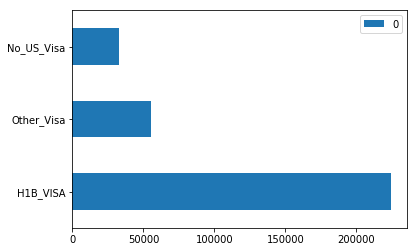

In [846]:
tmp_visa = pd.DataFrame(visa_info[['H1B_VISA','Other_Visa','No_US_Visa']].sum())
%matplotlib inline
import matplotlib.pyplot as plt
tmp_visa.plot(kind = 'barh')
plt.savefig("Visa.png")

In [847]:
#this is a requirement now I believe
(data['RI_POSTED_NOTICE_AT_WORKSITE'].value_counts(dropna=False) / data['RI_POSTED_NOTICE_AT_WORKSITE'].value_counts(dropna=False).sum()) * 100

Y      98.427278
A       1.488349
N       0.049537
NaN     0.034836
Name: RI_POSTED_NOTICE_AT_WORKSITE, dtype: float64

## Education comparison

In [848]:
(data['FOREIGN_WORKER_INFO_EDUCATION'].value_counts(dropna=False) / data['FOREIGN_WORKER_INFO_EDUCATION'].value_counts(dropna=False).sum()) * 100
#standardized, just like JOB_INFO_EDUCATION, going to combine the two columns to check if they have same or above degrees 

Master's       42.759119
Bachelor's     36.784309
None            8.170420
Doctorate       4.965532
Other           4.241012
High School     2.057226
Associate's     0.957823
NaN             0.064558
Name: FOREIGN_WORKER_INFO_EDUCATION, dtype: float64

Should probably redo this excluding the Other and Nulls (and maybe none?)

In [849]:
same_edu = np.where(data['JOB_INFO_EDUCATION'] == data ['FOREIGN_WORKER_INFO_EDUCATION'], 1 , 0 )

In [850]:
mapping = {"Master's" : 4, "Bachelor's": 3, "None":0, "Doctorate":5 , "Other": np.NaN, "High School":1, "Associate's":2, "NaN":np.NaN}

edu = data[['CASE_NUMBER','JOB_INFO_EDUCATION','FOREIGN_WORKER_INFO_EDUCATION']]
edu = edu.replace({'FOREIGN_WORKER_INFO_EDUCATION': mapping, 'JOB_INFO_EDUCATION': mapping})

In [851]:
edu['Higher education'] = np.where(edu['FOREIGN_WORKER_INFO_EDUCATION'] > edu['JOB_INFO_EDUCATION'], 1,0)

In [852]:
edu['Lower education'] = np.where(edu['FOREIGN_WORKER_INFO_EDUCATION'] < edu['JOB_INFO_EDUCATION'], 1,0)

In [511]:
mapping = {4.0: "Master's"  , 3:"Bachelor's",0: "None", 5:"Doctorate" , -1:"Other" , 1:"High School", 2:"Associate's", -1:"Null"}

edu = edu.replace({'FOREIGN_WORKER_INFO_EDUCATION': mapping, 'JOB_INFO_EDUCATION': mapping})

In [512]:
edu["Transition"] = edu.JOB_INFO_EDUCATION.astype(str) + " to " + edu.FOREIGN_WORKER_INFO_EDUCATION.astype(str)

In [514]:
#edu[['Higher education','Lower education']].sum()
ed = edu.loc[(edu['Lower education']  == 1.0) | (edu['Higher education'] == 1.0)]
ed = ed.loc[(~ed['FOREIGN_WORKER_INFO_EDUCATION'].isin(['Null','Other','None']) ) |(~ed['JOB_INFO_EDUCATION'].isin(['Null','Other','None']) ) ]
ed = ed.loc[(pd.notnull(ed['FOREIGN_WORKER_INFO_EDUCATION'])  ) |(pd.notnull(ed['JOB_INFO_EDUCATION'])) ]

pd.DataFrame(ed.groupby(['Transition'])['Transition'].count().sort_values(ascending=False))
#341585

,Transition
Transition,
Bachelor's to Master's,29596
Master's to Bachelor's,25157
Master's to Doctorate,4948
Bachelor's to NaN,3358
None to Bachelor's,2760
None to High School,2333
Bachelor's to None,1185
None to Associate's,1070
None to NaN,960


In [361]:
#Getting decision date year
pd.DatetimeIndex(data['DECISION_DATE']).year

Int64Index([2015, 2015, 2014, 2015, 2015, 2014, 2015, 2015, 2015, 2015,
            ...
            2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name='DECISION_DATE', length=341585)

In [363]:
#Getting agent firm boolean
np.where(pd.isnull(data['AGENT_FIRM_NAME']), 0, 1)

array([1, 1, 1, ..., 1, 1, 0])

## Dealing with the recruitment date fields

In [105]:
recr_dates = data[["RECR_INFO_SWA_JOB_ORDER_START","RECR_INFO_SWA_JOB_ORDER_END","RECR_INFO_FIRST_AD_START","RECR_INFO_SECOND_AD_START","RECR_INFO_JOB_FAIR_FROM","RECR_INFO_JOB_FAIR_TO","RECR_INFO_ON_CAMPUS_RECR_FROM","RECR_INFO_ON_CAMPUS_RECR_TO","RI_EMPLOYER_WEB_POST_FROM","RI_EMPLOYER_WEB_POST_TO","RECR_INFO_PRO_ORG_ADVERT_FROM","RECR_INFO_PRO_ORG_ADVERT_TO","RI_JOB_SEARCH_WEBSITE_FROM","RI_JOB_SEARCH_WEBSITE_TO","RI_PVT_EMPLOYMENT_FIRM_FROM","RI_PVT_EMPLOYMENT_FIRM_TO","RI_EMPLOYEE_REFERRAL_PROG_FROM","RI_EMPLOYEE_REFERRAL_PROG_TO","RI_CAMPUS_PLACEMENT_FROM","RI_CAMPUS_PLACEMENT_TO","RI_LOCAL_ETHNIC_PAPER_FROM","RI_LOCAL_ETHNIC_PAPER_TO","RECR_INFO_RADIO_TV_AD_FROM","RECR_INFO_RADIO_TV_AD_TO"]]

In [108]:
recr_dates.head(n=10)

,RECR_INFO_SWA_JOB_ORDER_START,RECR_INFO_SWA_JOB_ORDER_END,RECR_INFO_FIRST_AD_START,RECR_INFO_SECOND_AD_START,RECR_INFO_JOB_FAIR_FROM,RECR_INFO_JOB_FAIR_TO,RECR_INFO_ON_CAMPUS_RECR_FROM,RECR_INFO_ON_CAMPUS_RECR_TO,RI_EMPLOYER_WEB_POST_FROM,RI_EMPLOYER_WEB_POST_TO,...,RI_PVT_EMPLOYMENT_FIRM_FROM,RI_PVT_EMPLOYMENT_FIRM_TO,RI_EMPLOYEE_REFERRAL_PROG_FROM,RI_EMPLOYEE_REFERRAL_PROG_TO,RI_CAMPUS_PLACEMENT_FROM,RI_CAMPUS_PLACEMENT_TO,RI_LOCAL_ETHNIC_PAPER_FROM,RI_LOCAL_ETHNIC_PAPER_TO,RECR_INFO_RADIO_TV_AD_FROM,RECR_INFO_RADIO_TV_AD_TO
0,2014-05-15 00:00:00,2014-06-27 00:00:00,2014-05-25,2014-06-01,NaT,NaT,NaT,NaT,2014-05-15 00:00:00,2014-06-27,...,NaT,NaT,NaN,NaT,2014-05-23 00:00:00,2014-06-27,NaN,NaT,NaT,NaT
1,2014-05-29 00:00:00,2014-07-03 00:00:00,2014-06-01,2014-06-08,NaT,NaT,NaT,NaT,2014-05-30 00:00:00,2014-06-27,...,NaT,NaT,NaN,NaT,NaN,NaT,2014-06-04 00:00:00,2014-06-04,NaT,NaT
2,2014-03-10 00:00:00,2014-04-11 00:00:00,2014-03-23,2014-03-30,NaT,NaT,NaT,NaT,NaN,NaT,...,NaT,NaT,NaN,NaT,NaN,NaT,2014-03-26 00:00:00,2014-03-26,NaT,NaT
3,2014-06-05 00:00:00,2014-07-07 00:00:00,2014-06-08,2014-06-15,NaT,NaT,NaT,NaT,NaN,NaT,...,NaT,NaT,NaN,NaT,NaN,NaT,2014-06-13 00:00:00,2014-06-13,NaT,NaT
4,2014-04-01 00:00:00,2014-05-06 00:00:00,2014-04-27,2014-05-04,NaT,NaT,NaT,NaT,2014-04-22 00:00:00,2014-06-26,...,NaT,NaT,2014-06-16 00:00:00,2014-07-03,NaN,NaT,NaN,NaT,NaT,NaT
5,2014-05-22 00:00:00,2014-06-24 00:00:00,2014-02-02,2014-02-09,NaT,NaT,NaT,NaT,NaN,NaT,...,NaT,NaT,NaN,NaT,NaN,NaT,2014-02-03 00:00:00,2014-02-03,NaT,NaT
6,2014-05-17 00:00:00,2014-06-21 00:00:00,2014-06-01,2014-06-08,NaT,NaT,NaT,NaT,2014-05-14 00:00:00,2014-06-17,...,NaT,NaT,2014-05-12 00:00:00,2014-06-16,NaN,NaT,NaN,NaT,NaT,NaT
7,2014-02-20 00:00:00,2014-03-22 00:00:00,2014-06-08,2014-06-15,NaT,NaT,NaT,NaT,2014-06-05 00:00:00,2014-07-09,...,NaT,NaT,NaN,NaT,NaN,NaT,2014-06-08 00:00:00,2014-06-08,NaT,NaT
8,2014-06-13 00:00:00,2014-07-15 00:00:00,2014-06-15,2014-06-22,NaT,NaT,NaT,NaT,2014-06-16 00:00:00,2014-07-16,...,NaT,NaT,NaN,NaT,NaN,NaT,2014-08-21 00:00:00,2014-08-21,NaT,NaT
9,2014-05-15 00:00:00,2014-06-16 00:00:00,2014-06-15,2014-06-22,NaT,NaT,NaT,NaT,NaN,NaT,...,NaT,NaT,NaN,NaT,NaN,NaT,2014-06-19 00:00:00,2014-06-19,NaT,NaT


In [313]:
import datetime as dt

In [288]:
#recr_dates['RECR_INFO_SWA_JOB_ORDER_START'] = pd.to_datetime(recr_dates['RECR_INFO_SWA_JOB_ORDER_START'])
#recr_dates['RECR_INFO_SWA_JOB_ORDER_START'] = pd.to_datetime(recr_dates['RECR_INFO_SWA_JOB_ORDER_START'], errors='ignore')#
#recr_dates['RI_EMPLOYEE_REFERRAL_PROG_TO']
tmp = recr_dates['RI_EMPLOYEE_REFERRAL_PROG_TO'][4]
tmp.iloc[0]
#datetime.strptime(tmp.iloc[0], "%Y-%m-%d")

Timestamp('2014-07-03 00:00:00')

In [304]:
tmp = pd.DataFrame(recr_dates['RI_EMPLOYEE_REFERRAL_PROG_TO'])
tmp.dtypes.value_counts()

datetime64[ns]    1
dtype: int64

In [305]:
recr_dates['RECR_INFO_SWA_JOB_ORDER_START'] = np.where(recr_dates['RECR_INFO_SWA_JOB_ORDER_START'].isnull(), pd.NaT, recr_dates['RECR_INFO_SWA_JOB_ORDER_START'])

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [307]:
recr_dates['RECR_INFO_SWA_JOB_ORDER_END'] = np.where(recr_dates['RECR_INFO_SWA_JOB_ORDER_END'].isnull(), pd.NaT, recr_dates['RECR_INFO_SWA_JOB_ORDER_END'])

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [325]:
if isinstance(type(recr_dates['RECR_INFO_SWA_JOB_ORDER_START'].iloc[1]), pd.Timestamp):
    #isinstance(now, datetime.datetime)
    print("Yes")
else:
    print("No")

No


In [143]:
(recr_dates["RECR_INFO_JOB_FAIR_TO"] - recr_dates["RECR_INFO_JOB_FAIR_FROM"]).value_counts()

0 days      2049
1 days       123
2 days        53
30 days       19
4 days        15
3 days        14
5 days        11
21 days       10
29 days        7
31 days        6
14 days        6
47 days        5
35 days        5
25 days        5
42 days        5
60 days        4
41 days        4
15 days        3
27 days        3
7 days         3
33 days        2
160 days       2
8 days         2
44 days        2
54 days        2
19 days        2
6 days         2
13 days        2
32 days        2
197 days       2
151 days       2
519 days       2
20 days        2
73 days        2
16 days        1
52 days        1
11 days        1
70 days        1
17 days        1
68 days        1
86 days        1
dtype: int64

In [308]:
recr_dates.dtypes

RECR_INFO_SWA_JOB_ORDER_START             object
RECR_INFO_SWA_JOB_ORDER_END               object
RECR_INFO_FIRST_AD_START          datetime64[ns]
RECR_INFO_SECOND_AD_START         datetime64[ns]
RECR_INFO_JOB_FAIR_FROM           datetime64[ns]
RECR_INFO_JOB_FAIR_TO             datetime64[ns]
RECR_INFO_ON_CAMPUS_RECR_FROM     datetime64[ns]
RECR_INFO_ON_CAMPUS_RECR_TO       datetime64[ns]
RI_EMPLOYER_WEB_POST_FROM                 object
RI_EMPLOYER_WEB_POST_TO           datetime64[ns]
RECR_INFO_PRO_ORG_ADVERT_FROM             object
RECR_INFO_PRO_ORG_ADVERT_TO       datetime64[ns]
RI_JOB_SEARCH_WEBSITE_FROM                object
RI_JOB_SEARCH_WEBSITE_TO          datetime64[ns]
RI_PVT_EMPLOYMENT_FIRM_FROM       datetime64[ns]
RI_PVT_EMPLOYMENT_FIRM_TO         datetime64[ns]
RI_EMPLOYEE_REFERRAL_PROG_FROM            object
RI_EMPLOYEE_REFERRAL_PROG_TO      datetime64[ns]
RI_CAMPUS_PLACEMENT_FROM                  object
RI_CAMPUS_PLACEMENT_TO            datetime64[ns]
RI_LOCAL_ETHNIC_PAPE

In [352]:
#GOing to try and just do a full count of how many recruitments options they tried
recr_count = recr_dates[["RECR_INFO_SWA_JOB_ORDER_START","RECR_INFO_FIRST_AD_START","RECR_INFO_SECOND_AD_START","RECR_INFO_JOB_FAIR_FROM", "RECR_INFO_ON_CAMPUS_RECR_FROM","RI_EMPLOYER_WEB_POST_FROM","RECR_INFO_PRO_ORG_ADVERT_FROM","RI_JOB_SEARCH_WEBSITE_FROM","RI_PVT_EMPLOYMENT_FIRM_FROM","RI_EMPLOYEE_REFERRAL_PROG_FROM","RI_CAMPUS_PLACEMENT_FROM","RI_LOCAL_ETHNIC_PAPER_FROM","RECR_INFO_RADIO_TV_AD_FROM"]]

In [353]:
recr_count.head(n=10)

,RECR_INFO_SWA_JOB_ORDER_START,RECR_INFO_FIRST_AD_START,RECR_INFO_SECOND_AD_START,RECR_INFO_JOB_FAIR_FROM,RECR_INFO_ON_CAMPUS_RECR_FROM,RI_EMPLOYER_WEB_POST_FROM,RECR_INFO_PRO_ORG_ADVERT_FROM,RI_JOB_SEARCH_WEBSITE_FROM,RI_PVT_EMPLOYMENT_FIRM_FROM,RI_EMPLOYEE_REFERRAL_PROG_FROM,RI_CAMPUS_PLACEMENT_FROM,RI_LOCAL_ETHNIC_PAPER_FROM,RECR_INFO_RADIO_TV_AD_FROM
0,2014-05-15 00:00:00,2014-05-25,2014-06-01,NaT,NaT,2014-05-15 00:00:00,NaN,2014-05-16 00:00:00,NaT,NaN,2014-05-23 00:00:00,NaN,NaT
1,2014-05-29 00:00:00,2014-06-01,2014-06-08,NaT,NaT,2014-05-30 00:00:00,NaN,2014-05-29 00:00:00,NaT,NaN,NaN,2014-06-04 00:00:00,NaT
2,2014-03-10 00:00:00,2014-03-23,2014-03-30,NaT,NaT,NaN,2014-03-21 00:00:00,2014-03-21 00:00:00,NaT,NaN,NaN,2014-03-26 00:00:00,NaT
3,2014-06-05 00:00:00,2014-06-08,2014-06-15,NaT,NaT,NaN,2014-07-01 00:00:00,2014-06-11 00:00:00,NaT,NaN,NaN,2014-06-13 00:00:00,NaT
4,2014-04-01 00:00:00,2014-04-27,2014-05-04,NaT,NaT,2014-04-22 00:00:00,NaN,2014-04-27 00:00:00,NaT,2014-06-16 00:00:00,NaN,NaN,NaT
5,2014-05-22 00:00:00,2014-02-02,2014-02-09,NaT,NaT,NaN,2014-03-01 00:00:00,2014-05-22 00:00:00,NaT,NaN,NaN,2014-02-03 00:00:00,NaT
6,2014-05-17 00:00:00,2014-06-01,2014-06-08,NaT,NaT,2014-05-14 00:00:00,NaN,2014-05-13 00:00:00,NaT,2014-05-12 00:00:00,NaN,NaN,NaT
7,2014-02-20 00:00:00,2014-06-08,2014-06-15,NaT,NaT,2014-06-05 00:00:00,NaN,2014-06-08 00:00:00,NaT,NaN,NaN,2014-06-08 00:00:00,NaT
8,2014-06-13 00:00:00,2014-06-15,2014-06-22,NaT,NaT,2014-06-16 00:00:00,NaN,2014-06-16 00:00:00,NaT,NaN,NaN,2014-08-21 00:00:00,NaT
9,2014-05-15 00:00:00,2014-06-15,2014-06-22,NaT,NaT,NaN,2014-06-16 00:00:00,2014-06-16 00:00:00,NaT,NaN,NaN,2014-06-19 00:00:00,NaT


In [356]:
recr_count['Recr_Trials'] = recr_count.count(axis = 1)

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Final data

In [760]:
data_fin = data[['CASE_NUMBER','CASE_STATUS']]

In [444]:
data_fin.groupby(['CASE_STATUS','LAWYER'])['CASE_STATUS'].count()

CASE_STATUS  LAWYER
Certified    0          39876
             1         264626
Denied       0           3174
             1          17857
Withdrawn    0           2111
             1          13941
Name: CASE_STATUS, dtype: int64

In [447]:
 data_fin.groupby(['LAWYER'])['CASE_NUMBER'].count() 

LAWYER
0     45161
1    296424
Name: CASE_NUMBER, dtype: int64

In [761]:
data_fin['CASE_STATUS'] = pd.DataFrame(np.where(data['CASE_STATUS'] == 'Certified-Expired' , 'Certified', data['CASE_STATUS']))

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [763]:
data_fin['DEC_YEAR'] = pd.DatetimeIndex(data['DECISION_DATE']).year

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [764]:
data_fin['LAWYER'] = np.where(pd.isnull(data['AGENT_FIRM_NAME']), 0, 1)

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [382]:
#data_fin['RECR_TRIALS'] = recr_count.count(axis = 1)

In [765]:
data_fin['HIGHER_EDU'] =  np.where(edu['FOREIGN_WORKER_INFO_EDUCATION'] > edu['JOB_INFO_EDUCATION'], 1,0)

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [767]:
data_fin['SAME_EDU'] = np.where(data['JOB_INFO_EDUCATION'] == data ['FOREIGN_WORKER_INFO_EDUCATION'], 1 , 0 )

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [768]:
data_fin.shape

(341585, 6)

In [771]:
visa_info.shape

(341585, 5)

In [776]:
data.shape

(341585, 125)

In [777]:
data.drop_duplicates().shape

(215294, 125)

In [779]:
data_fin.duplicated

<bound method DataFrame.duplicated of           CASE_NUMBER CASE_STATUS  DEC_YEAR  LAWYER  HIGHER_EDU  SAME_EDU
0       A-14220-96665   Certified      2015       1           0         0
1       A-14220-96720   Certified      2015       1           0         1
2       A-14203-91167   Certified      2014       1           0         1
3       A-14206-92509   Certified      2015       1           0         1
4       A-14202-90786   Certified      2015       1           1         0
5       A-14202-90819   Certified      2014       1           0         1
6       A-14202-90920   Certified      2015       1           0         1
7       A-14220-96712   Certified      2015       1           0         1
8       A-14226-98150   Certified      2015       1           0         1
9       A-14226-98245   Certified      2015       1           0         1
10      A-14224-97486   Certified      2015       1           0         1
11      A-14224-97503   Certified      2015       1           0         1


In [772]:
data_fin.merge(visa_info, how="left", left_on = "CASE_NUMBER", right_on = "CASE_NUMBER").drop_duplicates()

,CASE_NUMBER,CASE_STATUS,DEC_YEAR,LAWYER,HIGHER_EDU,SAME_EDU,CLASS_OF_ADMISSION,H1B_VISA,Other_Visa,No_US_Visa
0,A-14220-96665,Certified,2015,1,0,0,H-1B,1,0,0
1,A-14220-96720,Certified,2015,1,0,1,H-1B,1,0,0
2,A-14203-91167,Certified,2014,1,0,1,L-1,0,1,0
3,A-14206-92509,Certified,2015,1,0,1,H-1B,1,0,0
4,A-14202-90786,Certified,2015,1,1,0,H-1B,1,0,0
5,A-14202-90819,Certified,2014,1,0,1,H-1B,1,0,0
6,A-14202-90920,Certified,2015,1,0,1,H-1B,1,0,0
7,A-14220-96712,Certified,2015,1,0,1,H-1B,1,0,0
8,A-14226-98150,Certified,2015,1,0,1,H-1B,1,0,0
9,A-14226-98245,Certified,2015,1,0,1,None,0,0,1
